### **Project:** Analyzing COVID-19 Vaccination Trends (Updated Quarterly)


*Objectives:*
    - Explore global vaccination trends using Pandas.
    - Visualize quarterly vaccination progress using Matplotlib.
    - Compare vaccination rates across countries.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Vaccination Data

In [2]:
# Load the dataset
df = pd.read_csv("vaccination-data.csv")  # Update with actual file path

# Display first few rows
df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


Data Preprocessing

In [3]:
# Convert 'DATE_UPDATED' to datetime format
df['DATE_UPDATED'] = pd.to_datetime(df['DATE_UPDATED'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['DATE_UPDATED'])

# Fill missing numeric values with 0
num_cols = ['TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE', 
            'PERSONS_LAST_DOSE', 'PERSONS_BOOSTER_ADD_DOSE']
df[num_cols] = df[num_cols].fillna(0)

# Fill missing categorical values with 'Unknown'
cat_cols = ['VACCINES_USED', 'WHO_REGION']
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Display first few rows
df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,Unknown,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,Unknown,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,Unknown,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,Unknown,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,Unknown,2021-01-13,NaN,402371.0,14.0


 Aggregate Data Quarterly

In [4]:
# Set 'DATE_UPDATED' as index
df.set_index('DATE_UPDATED', inplace=True)

# Aggregate quarterly data
quarterly_data = df.resample('QE').sum(numeric_only=True).reset_index()

Global Vaccination Trend (Quarterly)

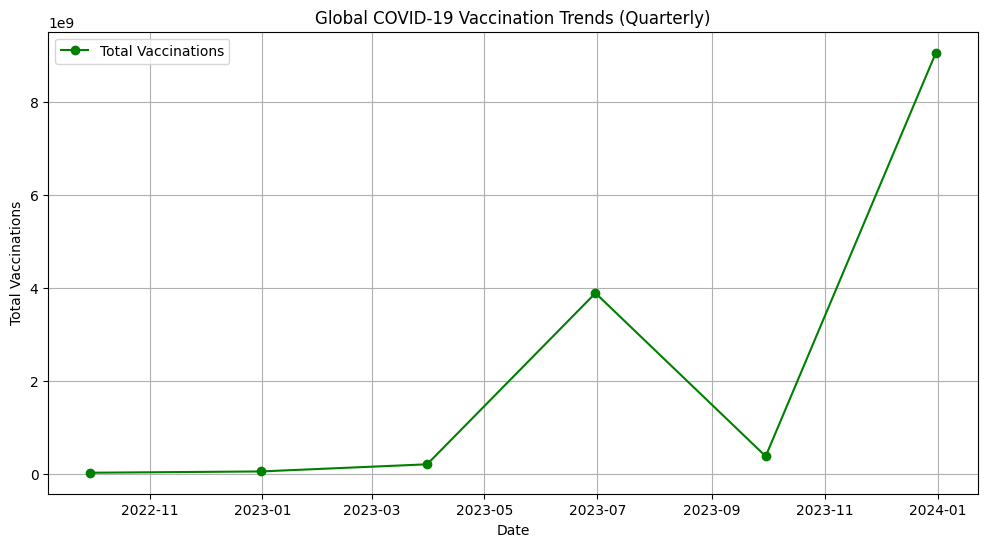

In [5]:
# 📌 Global Vaccination Trends
plt.figure(figsize=(12,6))
plt.plot(quarterly_data['DATE_UPDATED'], quarterly_data['TOTAL_VACCINATIONS'], 
         label='Total Vaccinations', color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Global COVID-19 Vaccination Trends (Quarterly)')
plt.legend()
plt.grid()
plt.show()

Comparing Countries' Vaccination Progress

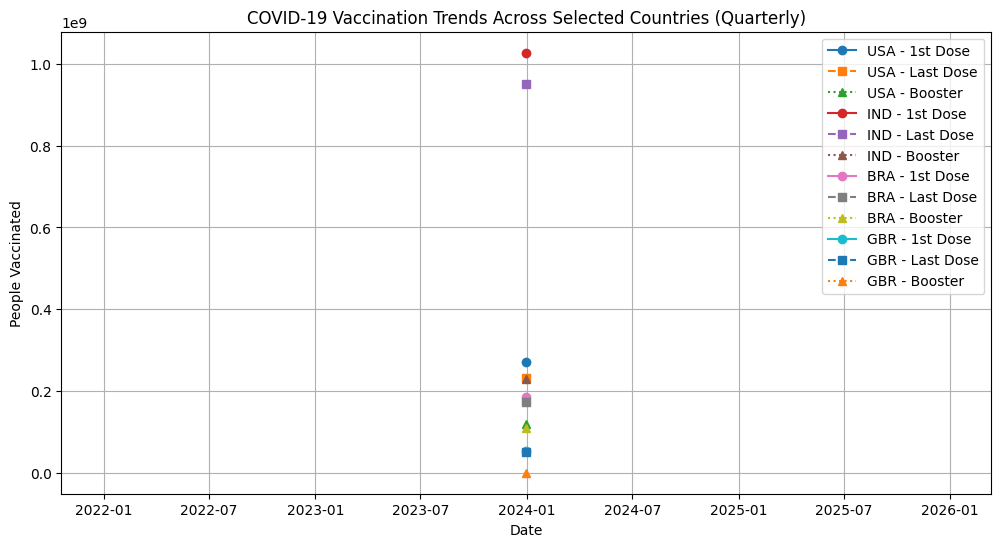

In [6]:
# 📌 Country-Specific Analysis
countries = ['USA', 'IND', 'BRA', 'GBR']  # ISO3 codes

# Filter and resample country data
fig, ax = plt.subplots(figsize=(12,6))

for country in countries:
    country_trend = df[df['ISO3'] == country].resample('QE').sum(numeric_only=True)

    # Plot different doses
    ax.plot(country_trend.index, country_trend['PERSONS_VACCINATED_1PLUS_DOSE'], 
            label=f'{country} - 1st Dose', marker='o')
    ax.plot(country_trend.index, country_trend['PERSONS_LAST_DOSE'], 
            linestyle='dashed', label=f'{country} - Last Dose', marker='s')
    ax.plot(country_trend.index, country_trend['PERSONS_BOOSTER_ADD_DOSE'], 
            linestyle='dotted', label=f'{country} - Booster', marker='^')
# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('People Vaccinated')
ax.set_title('COVID-19 Vaccination Trends Across Selected Countries (Quarterly)')
ax.legend()
ax.grid()
plt.show()